# Install relevant libraries

In [ ]:
!pip install textblob
!pip install vaderSentiment
!pip install deep_translator

In [ ]:
import re
import pandas as pd
import numpy as np
from textblob import TextBlob
from time import sleep
import os
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from deep_translator import GoogleTranslator
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Cleaning the CANIS Dataset

Import the original dataset and show a few rows

In [ ]:
original_file_path = "/content/drive/My Drive/CANIS dataset.xlsx"

original_df = pd.read_excel(original_file_path)
original_df.head()

,Name (English),Name (Chinese),Region of Focus,Language,Entity owner (English),Entity owner (Chinese),Parent entity (English),Parent entity (Chinese),X (Twitter) handle,X (Twitter) URL,...,Instagram Follower #,Threads account,Threads URL,Threads Follower #,YouTube account,YouTube URL,YouTube Subscriber #,TikTok account,TikTok URL,TikTok Subscriber #
0,Yang Xinmeng (Abby Yang),杨欣萌,Anglosphere,English,China Media Group (CMG),中央广播电视总台,Central Publicity Department,中共中央宣传部,_bubblyabby_,https://twitter.com/_bubblyabby_,...,9507.0,_bubblyabby_,https://www.threads.net/@_bubblyabby_,197.0,itsAbby,https://www.youtube.com/itsAbby,4680.0,_bubblyabby_,https://www.tiktok.com/@_bubblyabby_,660.0
1,CGTN Culture Express,NaN,Anglosphere,English,China Media Group (CMG),中央广播电视总台,Central Publicity Department,中共中央宣传部,_cultureexpress,https://twitter.com/_cultureexpress,...,635.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,All-China Students' Federation,中华全国学联,China,Chinese,All-China Students' Federation,中华全国学生联合会,Central Committee of the Communist Youth League,共青团中央,ACSF1919,https://twitter.com/ACSF1919,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Chen Zhong (Dechinghutay / Ghoti),陈重,Afghanistan,Pashto,China Media Group (CMG),中央广播电视总台,Central Publicity Department,中共中央宣传部,afghanchina,https://twitter.com/afghanchina,...,NaN,NaN,NaN,NaN,dechinghutay,https://www.youtube.com/channel/UCXl9X2fi65wKf...,695.0,dechinghutay,https://www.tiktok.com/@dechinghutay,326100.0
4,Yang Sheng,NaN,Anglosphere,English,People's Daily Press,人民日报社,Central Committee of the Chinese Communist Party,中国共产党中央委员会,AlexYsalex17,https://twitter.com/AlexYsalex17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Remove columns with names in Chinese and show a few rows

In [ ]:
original_df = original_df.drop(['Name (Chinese)', 'Parent entity (Chinese)', 'Entity owner (Chinese)', 'Parent entity (Chinese)' ], axis=1)
original_df.head()


,Name (English),Region of Focus,Language,Entity owner (English),Parent entity (English),X (Twitter) handle,X (Twitter) URL,X (Twitter) Follower #,Facebook page,Facebook URL,...,Instagram Follower #,Threads account,Threads URL,Threads Follower #,YouTube account,YouTube URL,YouTube Subscriber #,TikTok account,TikTok URL,TikTok Subscriber #
0,Yang Xinmeng (Abby Yang),Anglosphere,English,China Media Group (CMG),Central Publicity Department,_bubblyabby_,https://twitter.com/_bubblyabby_,1678.0,itsAbby-103043374799622,https://www.facebook.com/itsAbby-103043374799622,...,9507.0,_bubblyabby_,https://www.threads.net/@_bubblyabby_,197.0,itsAbby,https://www.youtube.com/itsAbby,4680.0,_bubblyabby_,https://www.tiktok.com/@_bubblyabby_,660.0
1,CGTN Culture Express,Anglosphere,English,China Media Group (CMG),Central Publicity Department,_cultureexpress,https://twitter.com/_cultureexpress,2488.0,NaN,NaN,...,635.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,All-China Students' Federation,China,Chinese,All-China Students' Federation,Central Committee of the Communist Youth League,ACSF1919,https://twitter.com/ACSF1919,5136.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Chen Zhong (Dechinghutay / Ghoti),Afghanistan,Pashto,China Media Group (CMG),Central Publicity Department,afghanchina,https://twitter.com/afghanchina,1800.0,dechinghutay,https://www.facebook.com/dechinghutay/,...,NaN,NaN,NaN,NaN,dechinghutay,https://www.youtube.com/channel/UCXl9X2fi65wKf...,695.0,dechinghutay,https://www.tiktok.com/@dechinghutay,326100.0
4,Yang Sheng,Anglosphere,English,People's Daily Press,Central Committee of the Chinese Communist Party,AlexYsalex17,https://twitter.com/AlexYsalex17,2821.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Group countries into "Western" or "non-Western" on the basis of being US allies in NATO or the EU, including Switzerland, Japan, South Korea, New Zealand, Australia, Taiwan, Israel, and Singapore

In [ ]:
# Understanding which regions have a high amount of Chinese social media presence
western_countries = ['Switzerland', 'Austria', 'EU', 'France', 'Cyprus',
                     'Italy', 'USA', 'Bulgaria', 'Japan', 'South Korea', 'Poland', 'UK',
                     'Finland', 'Spain', 'Netherlands', 'Belgium', 'New Zealand',
                     'Germany', 'Canada', 'Türkiye', 'Australia', 'Greece', 'Albania', 'Croatia',
                     'Ireland', 'Malta', 'Portugal', 'Slovakia', 'Slovenia', 'Denmark', 'Hungary',
                     'Montenegro', 'Estonia', 'Iceland', 'Lithuania', 'Czech Rep.', 'Israel',
                     'Norway', 'Latvia', 'Taiwan', 'Romania', 'North Macedonia', 'Singapore']

original_df['Western'] = original_df['Region of Focus'].apply(lambda x: "yes" if x in western_countries else "no")

original_df.head(20)



,Name (English),Region of Focus,Language,Entity owner (English),Parent entity (English),X (Twitter) handle,X (Twitter) URL,X (Twitter) Follower #,Facebook page,Facebook URL,...,Threads account,Threads URL,Threads Follower #,YouTube account,YouTube URL,YouTube Subscriber #,TikTok account,TikTok URL,TikTok Subscriber #,Western
0,Yang Xinmeng (Abby Yang),Anglosphere,English,China Media Group (CMG),Central Publicity Department,_bubblyabby_,https://twitter.com/_bubblyabby_,1678.0,itsAbby-103043374799622,https://www.facebook.com/itsAbby-103043374799622,...,_bubblyabby_,https://www.threads.net/@_bubblyabby_,197.0,itsAbby,https://www.youtube.com/itsAbby,4680.0,_bubblyabby_,https://www.tiktok.com/@_bubblyabby_,660.0,no
1,CGTN Culture Express,Anglosphere,English,China Media Group (CMG),Central Publicity Department,_cultureexpress,https://twitter.com/_cultureexpress,2488.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
2,All-China Students' Federation,China,Chinese,All-China Students' Federation,Central Committee of the Communist Youth League,ACSF1919,https://twitter.com/ACSF1919,5136.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
3,Chen Zhong (Dechinghutay / Ghoti),Afghanistan,Pashto,China Media Group (CMG),Central Publicity Department,afghanchina,https://twitter.com/afghanchina,1800.0,dechinghutay,https://www.facebook.com/dechinghutay/,...,NaN,NaN,NaN,dechinghutay,https://www.youtube.com/channel/UCXl9X2fi65wKf...,695.0,dechinghutay,https://www.tiktok.com/@dechinghutay,326100.0,no
4,Yang Sheng,Anglosphere,English,People's Daily Press,Central Committee of the Chinese Communist Party,AlexYsalex17,https://twitter.com/AlexYsalex17,2821.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
5,Yunnan Gateway,Yunnan,Chinese,Yunnan Daily Press Group,State Council Information Office (SCIO),Amazing_Yunnan,https://twitter.com/Amazing_Yunnan,12400.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
6,Chen Xu,Switzerland,German,Ministry of Foreign Affairs,Ministry of Foreign Affairs,Amb_ChenXu,https://twitter.com/Amb_ChenXu,12600.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes
7,Li Song,Austria,German,Ministry of Foreign Affairs,Ministry of Foreign Affairs,Amb_LiSong,https://twitter.com/Amb_LiSong,5972.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes
8,Lu Kang,Indonesia,Bahasa Indonesia,Ministry of Foreign Affairs,Ministry of Foreign Affairs,Amb_LuKang,https://twitter.com/Amb_LuKang,40600.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
9,Zhang Yiming,UAE,Arabic,Ministry of Foreign Affairs,Ministry of Foreign Affairs,Amb_Yiming,https://twitter.com/Amb_Yiming,20300.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


In [ ]:
original_df.to_csv('original_df.csv')

Visualize frequencies of which social media platform is most prevalent among the 6 we are given

In [1]:
# set plot style: grey grid in the background:
sns.set(style="darkgrid")

# load dataset
tips = sns.load_dataset("tips")

# Set the figure size
plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    x="Post Frequency",
    y="Day",
    data=tips,
    estimator=sum,
    ci=None,
    color='#69b3a2');

NameError: ignored

Text(0, 0.5, 'Number of Accounts')

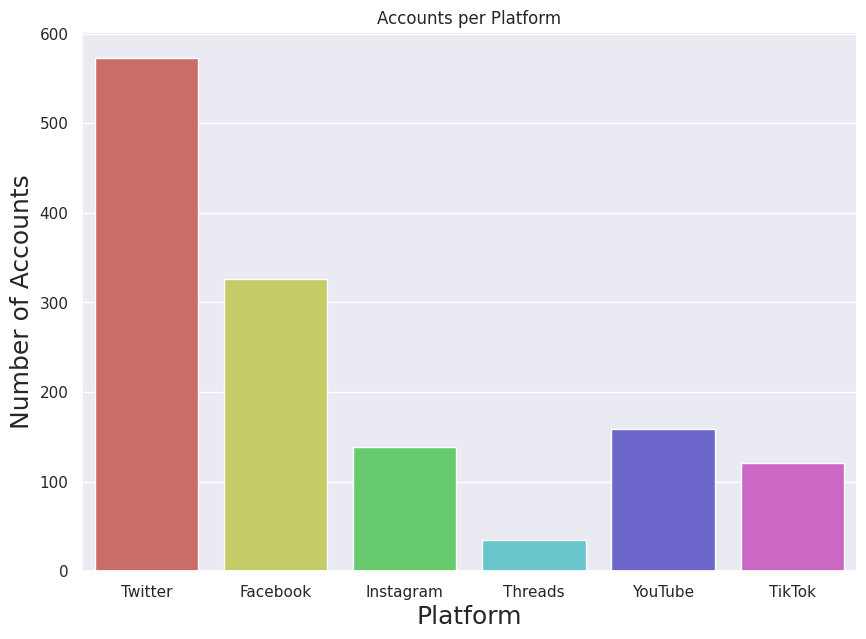

In [ ]:
twitter_count = original_df[original_df['X (Twitter) URL'].notna()].shape[0]
facebook_count = original_df[original_df['Facebook URL'].notna()].shape[0]
instagram_count = original_df[original_df['Instagram URL'].notna()].shape[0]
threads_count = original_df[original_df['Threads URL'].notna()].shape[0]
youtube_count = original_df[original_df['YouTube URL'].notna()].shape[0]
tiktok_count = original_df[original_df['TikTok URL'].notna()].shape[0]

# fig, ax = plt.subplots()

# accounts = ['Twitter', 'Facebook', 'Instagram', 'Threads', 'YouTube', 'TikTok']
# counts = [twitter_count, facebook_count, instagram_count, threads_count, youtube_count, tiktok_count]

# Preparing data for seaborn bar plot
counts_data = {
    'Platform': ['Twitter', 'Facebook', 'Instagram', 'Threads', 'YouTube', 'TikTok'],
    'Number of Accounts': [twitter_count, facebook_count, instagram_count, threads_count, youtube_count, tiktok_count]
}
df = pd.DataFrame(counts_data)

palette_colors = sns.color_palette("hls", 6)

# Set the figure size
plt.figure(figsize=(10, 7))

sns.set_palette(sns.color_palette("hls", 6))

# plot a bar chart
sns.barplot(
    x= 'Platform',
    y='Number of Accounts',
    data=df,
    estimator=sum,
    errorbar=None).set(title='Accounts per Platform')

plt.xlabel('Platform', fontsize=18)
plt.ylabel('Number of Accounts', fontsize=18)



Given that Twitter appears to be the main social media platform being used, as almost 600 out of the approximately 750 state actors in the dataset are on it, we will focus our anlysis on Twitter only.

Filter out state actors that are on Twitter (i.e. drop rows that don't have Twitter Account URLs)

In [ ]:
twitter_df = original_df[original_df['X (Twitter) URL'].notna() & (original_df['X (Twitter) URL'] != '')]

twitter_df = twitter_df.sort_values(by='X (Twitter) Follower #', ascending=False)

## Dropping the rest of the social media accounts
twitter_df = twitter_df.drop(['Facebook page', 'Facebook URL', 'Facebook Follower #',
                              'Instragram page', 'Instagram URL', 'Instagram Follower #',
                              'Threads account', 'Threads URL', 'Threads Follower #',
                              'YouTube account', 'YouTube URL', 'YouTube Subscriber #',
                              'TikTok account', 'TikTok URL', 'TikTok Subscriber #'], axis=1)

twitter_df.head()

,Name (English),Region of Focus,Language,Entity owner (English),Parent entity (English),X (Twitter) handle,X (Twitter) URL,X (Twitter) Follower #,Western
89,CGTN,Anglosphere,English,China Media Group (CMG),Central Publicity Department,CGTNOfficial,https://twitter.com/CGTNOfficial,13000000.0,no
516,Xinhua News Agency,China,Chinese,Xinhua News Agency,State Council,XHNews,https://twitter.com/XHNews,11900000.0,no
416,People's Daily,China,Chinese,People's Daily Press,Central Committee of the Chinese Communist Party,PDChina,https://twitter.com/PDChina,6600000.0,no
137,China Daily,Anglosphere,English,China Daily Press,Central Publicity Department,ChinaDaily,https://twitter.com/ChinaDaily,4100000.0,no
461,Hua Chunying,Anglosphere,English,Ministry of Foreign Affairs,Ministry of Foreign Affairs,SpokespersonCHN,https://twitter.com/SpokespersonCHN,2200000.0,no


## Data Wrangling with the Twitter DataSet

After scraping tweets 10 days worth of tweets from about 150 of the available Twitter accounts using OctoParse, load the tweets, translate them if they are not in English, and perform sentiment analysis on them

In [ ]:
# Download the VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')

# Define functions for translating non-English tweets and calculating polarity and subjectivity
def analyze_sentiment(text):
    sia = SentimentIntensityAnalyzer()
    if isinstance(text, str):
        sentiment_score = sia.polarity_scores(text)['compound']
        return sentiment_score
    else:
        return None
    return sentiment_score

def analyze_subjectivity(text):
    # Check if the text is not NaN (not a float)
    if isinstance(text, str):
        blob = TextBlob(text)
        subjectivity_score = blob.sentiment.subjectivity
        return subjectivity_score
    else:
        return None

def translate_tweets(text):
  translator = GoogleTranslator(source='auto', target='en')
  if isinstance(text, str):
    return translator.translate(text)
  else:
    return None

# Load the CSV file into a pandas DataFrame
csv_file_path = 'tweets.csv'
tweets_df = pd.read_csv(csv_file_path)

# Translate the non-English tweets into English
tweets_df['Content'] = tweets_df['Content'].apply(translate_tweets)

# Perform sentiment analysis on tweets and add new columns with sentiment scores
tweets_df['SentimentScore'] = tweets_df['Content'].apply(analyze_sentiment)
tweets_df['SubjectivityScore'] = tweets_df['Content'].apply(analyze_subjectivity)

tweets_df.to_csv("tweets_final.csv", index=False)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


FileNotFoundError: ignored

After getting all the sentiment scores, clean up the new dataset in preparation for analysis

In [ ]:
csv_file_path = 'tweets_final.csv'
tweets_final_df = pd.read_csv(csv_file_path)

# Get rid of random unnamed columns
tweets_final_df = tweets_final_df.drop(['Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14',
                                        'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
                                        'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20'], axis=1)

# Replacing NaN with 0 in certain columns
columns_to_replace = ['Review', 'RetweetNum', 'LikeNum', 'LookNum']
tweets_final_df[columns_to_replace] = tweets_final_df[columns_to_replace].fillna(0)

# Removing the K
def remove_k(x):
    if isinstance(x, str):
        if 'K' in x:
            return float(x.replace('K', '')) * 1000
    return float(x)  # Return as is if no special format

tweets_final_df['LikeNum'] = tweets_final_df['LikeNum'].apply(remove_k)
tweets_final_df['LookNum'] = tweets_final_df['LookNum'].apply(remove_k)

FileNotFoundError: ignored

Now that the datasets are prepared, run analyses

Group by user to get their tweet metrics

In [ ]:
original_df = pd.read_csv('Original_Twitter_Region.csv')
result_df = original_df.groupby('UserUrl').mean()
result_df.head()
merged_df = pd.merge(original_df, result_df, left_on='TwitterURL', right_on='UserUrl', how='inner')

FileNotFoundError: ignored

In [ ]:
merged_df
merged_df.to_csv("AccountRegion.csv")

In [ ]:
merged_df


In [ ]:
original_followers_df = pd.read_csv('CANIS_original_data.csv')
# original_followers_df
merged_df = pd.merge(original_followers_df, result_df, left_on='X (Twitter) URL', right_on='UserUrl', how='inner')

In [ ]:
merged_df.to_csv('Original_and_tweets.csv')mb

## Visualizations!!


In [ ]:
## Reference code

# Create an array with the colors you want to use
colors = ["#69b3a2", "#4374B3"]
sns.set_palette(sns.color_palette(colors))

# Set the figure size
plt.figure(figsize=(10, 10))

# grouped barplot
ax = sns.barplot(
    x="day",
    y="total_bill",
    hue="smoker",
    data=tips,
    ci=None
    )

# Customize the axes and title
ax.set_title("Smokers have bigger bills")
ax.set_ylabel("Bill value")

# Remove top and right borders
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [ ]:
## Previous code from previous bar charts
twitter_count = original_df[original_df['X (Twitter) URL'].notna()].shape[0]
facebook_count = original_df[original_df['Facebook URL'].notna()].shape[0]
instagram_count = original_df[original_df['Instagram URL'].notna()].shape[0]
threads_count = original_df[original_df['Threads URL'].notna()].shape[0]
youtube_count = original_df[original_df['YouTube URL'].notna()].shape[0]
tiktok_count = original_df[original_df['TikTok URL'].notna()].shape[0]

# fig, ax = plt.subplots()

# accounts = ['Twitter', 'Facebook', 'Instagram', 'Threads', 'YouTube', 'TikTok']
# counts = [twitter_count, facebook_count, instagram_count, threads_count, youtube_count, tiktok_count]

# Preparing data for seaborn bar plot
counts_data = {
    'Platform': ['Twitter', 'Facebook', 'Instagram', 'Threads', 'YouTube', 'TikTok'],
    'Number of Accounts': [twitter_count, facebook_count, instagram_count, threads_count, youtube_count, tiktok_count]
}
df = pd.DataFrame(counts_data)

palette_colors = sns.color_palette("hls", 6)

# Set the figure size
plt.figure(figsize=(10, 7))

sns.set_palette(sns.color_palette("hls", 6))

# plot a bar chart
sns.barplot(
    x= 'Platform',
    y='Number of Accounts',
    data=df,
    estimator=sum,
    errorbar=None).set(title='Accounts per Platform')

plt.xlabel('Platform', fontsize=18)
plt.ylabel('Number of Accounts', fontsize=18)

